In [1]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [2]:
#REading Dataset
dataset=pd.read_csv('housing_data.csv')
dataset.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [3]:
#Cleaning Data
dataset=dataset.drop(["longitude","latitude"], axis=1)
dataset

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,52,1627,280.0,565,259,3.8462,NEAR BAY,342200
...,...,...,...,...,...,...,...,...
20635,25,1665,374.0,845,330,1.5603,INLAND,78100
20636,18,697,150.0,356,114,2.5568,INLAND,77100
20637,17,2254,485.0,1007,433,1.7000,INLAND,92300
20638,18,1860,409.0,741,349,1.8672,INLAND,84700


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   housing_median_age  20640 non-null  int64  
 1   total_rooms         20640 non-null  int64  
 2   total_bedrooms      20433 non-null  float64
 3   population          20640 non-null  int64  
 4   households          20640 non-null  int64  
 5   median_income       20640 non-null  float64
 6   ocean_proximity     20640 non-null  object 
 7   median_house_value  20640 non-null  int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 1.3+ MB


In [5]:
#Counting null values
dataset.isnull().sum()


housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

In [6]:
#Removing Null Values
dataset=dataset.dropna()
dataset.isnull().sum()

housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
dtype: int64

In [7]:
dataset.shape

(20433, 8)

*NULL rows have been removed*

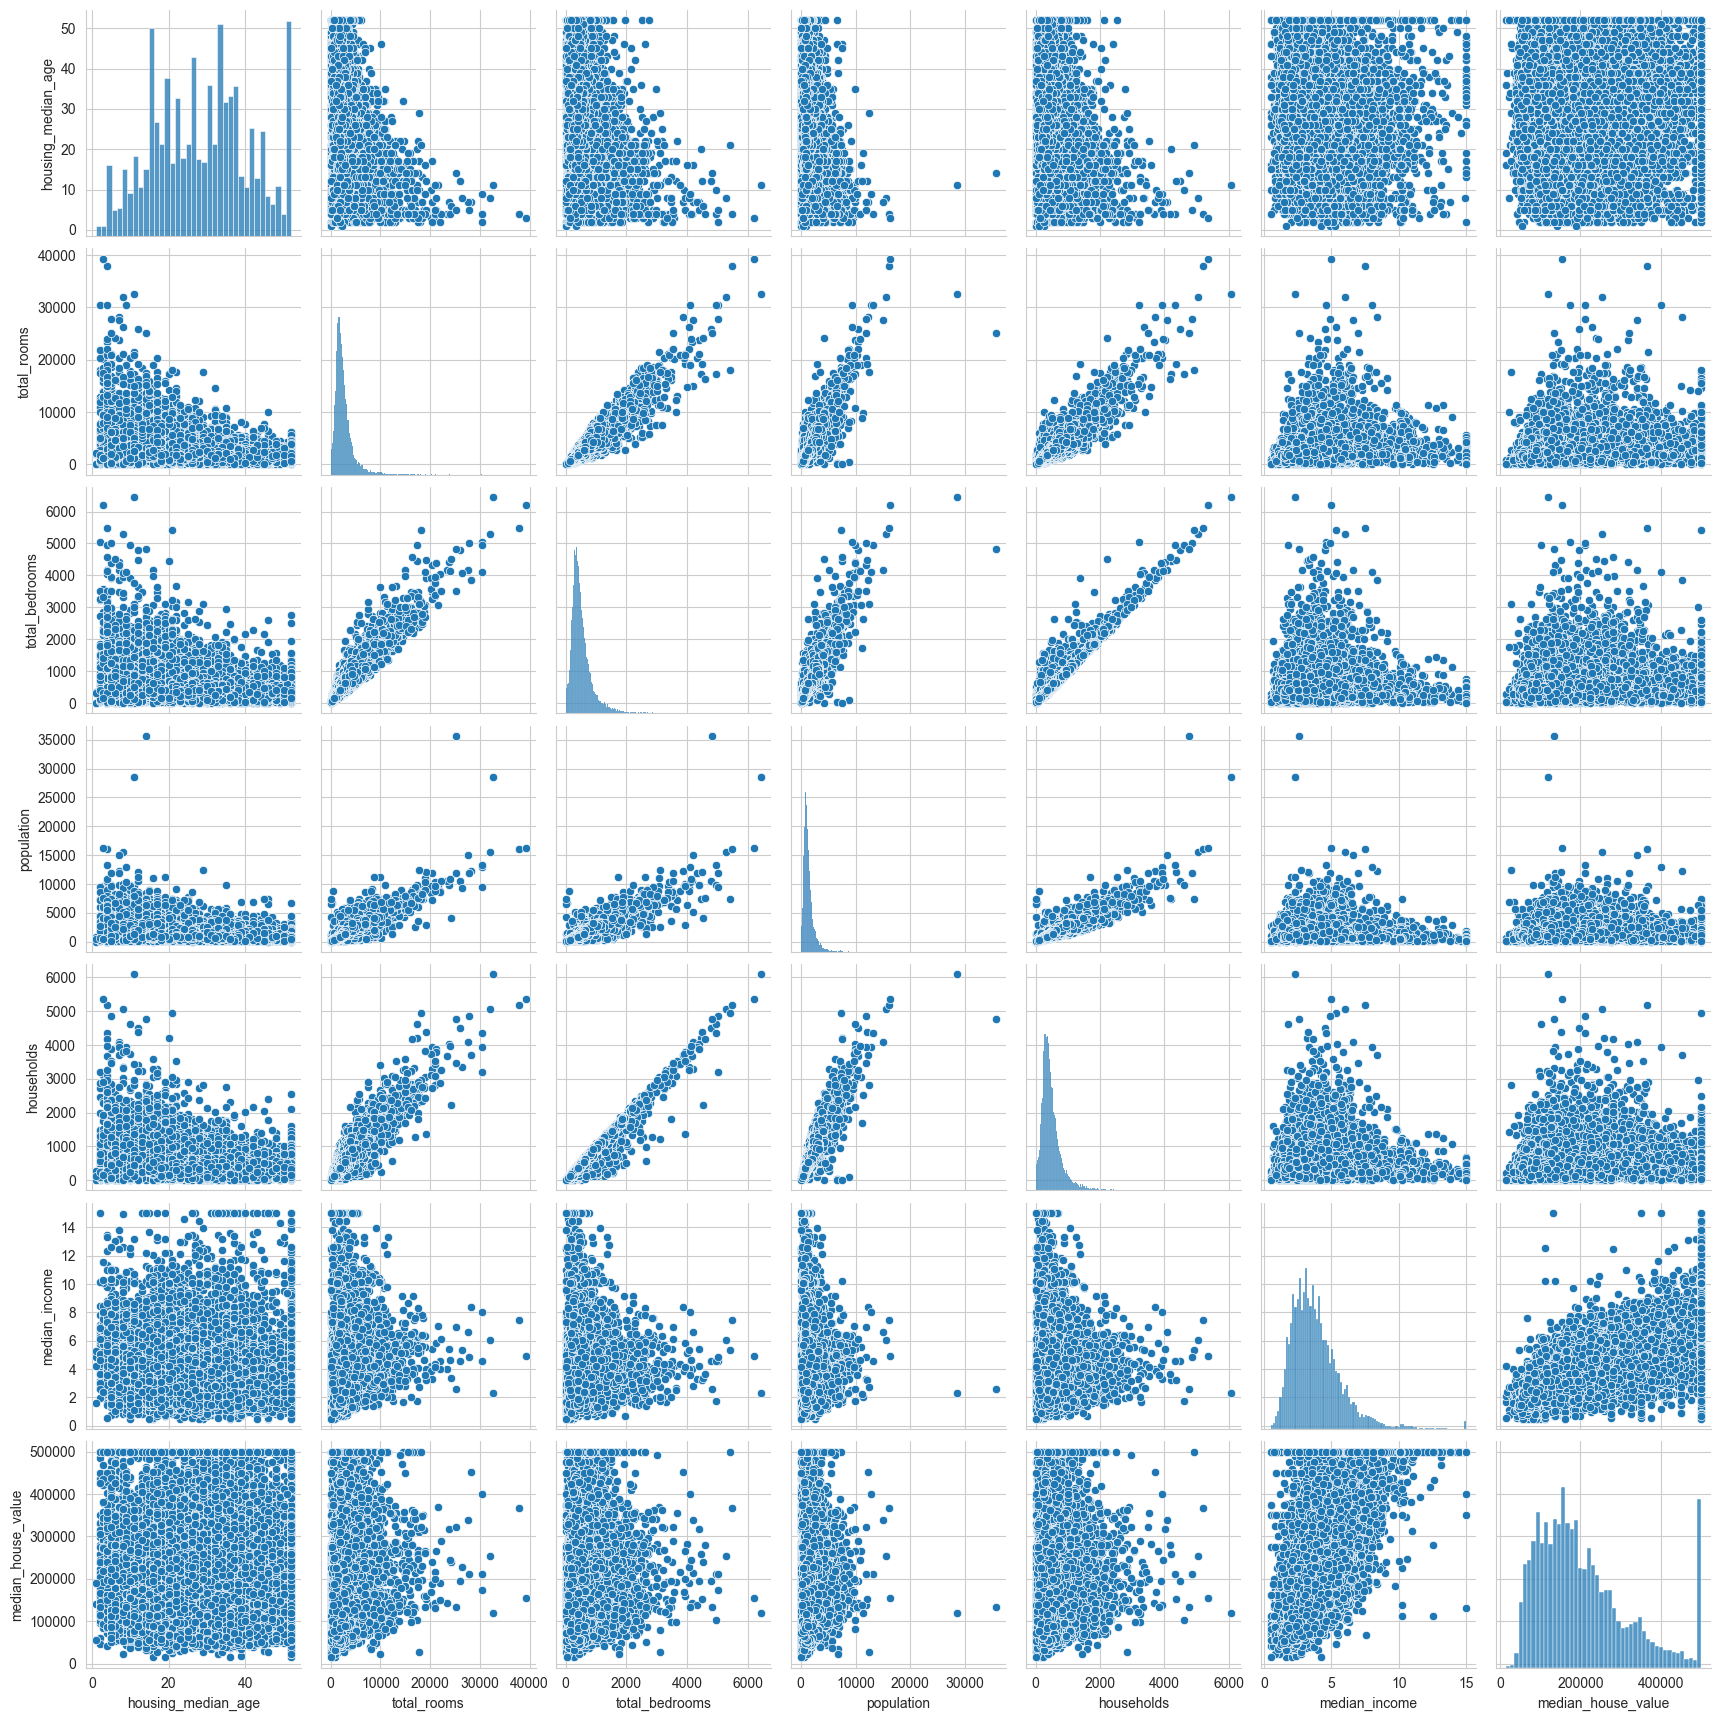

In [8]:
# Pairwise plot all data
sns.pairplot(dataset)

In [9]:
#Converting object to int type
dataset['ocean_proximity']=dataset["ocean_proximity"].astype('category').cat.codes
dataset

C:\Users\Khushi\AppData\Local\Temp\ipykernel_16420\335290132.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['ocean_proximity']=dataset["ocean_proximity"].astype('category').cat.codes


,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,41,880,129.0,322,126,8.3252,3,452600
1,21,7099,1106.0,2401,1138,8.3014,3,358500
2,52,1467,190.0,496,177,7.2574,3,352100
3,52,1274,235.0,558,219,5.6431,3,341300
4,52,1627,280.0,565,259,3.8462,3,342200
...,...,...,...,...,...,...,...,...
20635,25,1665,374.0,845,330,1.5603,1,78100
20636,18,697,150.0,356,114,2.5568,1,77100
20637,17,2254,485.0,1007,433,1.7000,1,92300
20638,18,1860,409.0,741,349,1.8672,1,84700


<Axes: >

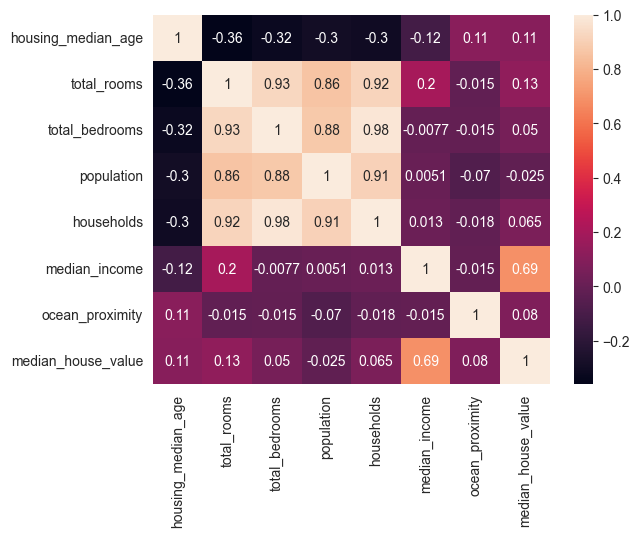

In [10]:
#HEatmap
sns.heatmap(dataset.corr(),annot=True)

In [11]:
#Splitting into x and y
x=dataset.drop("median_house_value", axis=1)
y=dataset["median_house_value"]

In [12]:
#Splitting into test and train data
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=101)

In [13]:
#importing the Linear Regression Algorithm
from sklearn.linear_model import LinearRegression

In [14]:
#creating LinearRegression Object
linear_regressor = LinearRegression()

# fitting the dataset
linear_regressor.fit(x_train,y_train)

# get predictions
y_pred = linear_regressor.predict(x_test)

In [15]:
#INFERENCE
#["housing_median_age","total_rooms","total_bedrooms","population","households","median_income", "ocean_proximity", "median_house_value"]
test_entry=[15,2655,493,1200,432,3.5179,1]

linear_regressor.predict([test_entry])

C:\Users\Khushi\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([159250.70765634])

In [16]:

test_entry2=[41,880,129,322,126,8.3252,3]

linear_regressor.predict([test_entry2])

C:\Users\Khushi\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([436216.17036936])

In [17]:
# get mse, mae, rmse, r2 score for the predictions
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 Score:',metrics.r2_score(y_test,y_pred))

MAE: 56248.85993307215
MSE: 5812159404.604194
RMSE: 76237.51966456014
R2 Score: 0.5694026173145899


In [18]:
print(linear_regressor.score(x_train,y_train))
print(linear_regressor.score(x_test,y_test))

0.5689416821003349
0.5694026173145899


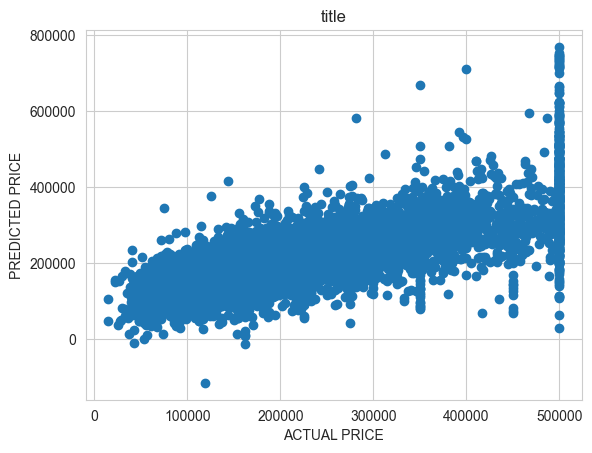

In [19]:

plt.scatter(y_test,y_pred)
plt.title("title")
plt.xlabel("ACTUAL PRICE")
plt.ylabel("PREDICTED PRICE")



"""def line(m,x,c):
    return m*x+c

from scipy.optimize import curve_fit

for i in y_pred:
    for i in y_test:
        a,b=curve_fit(line,y_test,y_pred)
    plt.plot(y_test,line(y_test,*a))"""


plt.show()

In [20]:
correlation = np.corrcoef(y_test,y_pred)[0,1]
correlation

0.7548424896374712